In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import t, sem
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



#### Using Vader to get the sentiment score (YOU CAN SKIP THIS THE DATA BELOW ALREADY HAS THE VADER SCORE SAVED)

In [ ]:
movies_df = pd.read_csv('movies.csv')

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    if text != 'No reviews available': # If there is actually a review
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0 

movies_df['sentiment'] = movies_df['reviews'].apply(get_vader_score)

movies_df.to_csv('movies_data.csv', index = False)

### EDAAAAA

In [2]:
movies = pd.read_csv('movies_data.csv')

In [3]:
num_df = movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment']].describe()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Create a table and add it to the axes
table = ax.table(cellText=num_df.values,
                 colLabels=num_df.columns,
                 rowLabels=num_df.index,
                 cellLoc='center', loc='center')

# Make column headers bold
for (i, j), cell in table.get_celld().items():
    if i == 0:  # This condition checks if it's a header row
        cell.set_text_props(fontweight='bold')
    if j == -1:  # This condition checks if it's a row label
        cell.set_text_props(fontweight='bold')

# Save the figure as an image
plt.savefig('movies_numeric_summary.png', bbox_inches='tight', dpi=300)
plt.close()  # Close the plot to free memory

In [4]:
sns.set_style("whitegrid")
sns.set_palette('tab10')

#### Scatterplot of Budget Vs Revenue with color for Sentiment

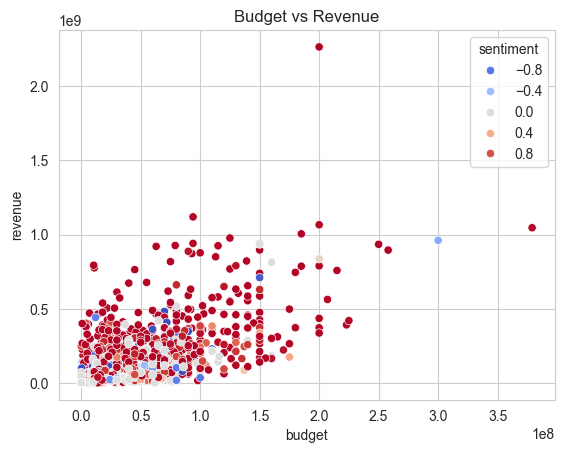

In [5]:
sns.scatterplot(movies, x = 'budget', y = 'revenue', hue = 'sentiment', palette= 'coolwarm')

plt.title("Budget vs Revenue")
plt.savefig("movies_budget_v_rev.png")
plt.show()
plt.close()

#### Histograms for Revenue and Budget

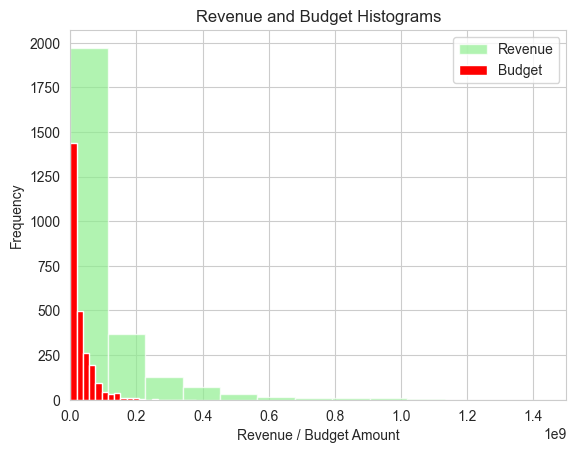

In [6]:
plt.hist(movies['revenue'], bins=20, color='lightgreen', alpha=0.7, label='Revenue')
plt.hist(movies['budget'], bins=20, color='red', label='Budget')

# Set the x-axis limit (max value to 1.5e+9)
plt.xlim(0, 1.5e9)
# Add a title and labels
plt.title('Revenue and Budget Histograms')

plt.xlabel('Revenue / Budget Amount')
plt.ylabel('Frequency')
plt.legend()

plt.savefig("movies_rev_budget_hist.png")
plt.show()

#### Correlation of Numeric Variables

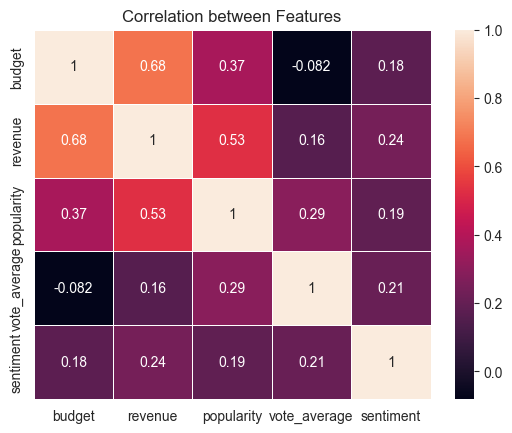

In [7]:
corr = movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment']].corr()

sns.heatmap(corr, annot = True, linewidths=0.5)
plt.title('Correlation between Features')
plt.savefig('corr_plot.png')
plt.show()

#### Looking at Genres

We are going to need to use something like one-hot-encoding later that will take care of our problem where movies have multiple genres. I think it would be cool though to use them as dummy variables so we can still use genre to help predict earnings

In [8]:
def convert_to_list(x):
    if isinstance(x, str) and x.strip():  # Check if x is a non-empty string
        return [genre.strip() for genre in x.split(',')]
    return ['Genre not listed'] 

# Apply the conversion function
movies['genres'] = movies['genres'].apply(convert_to_list)

# Verify the conversion worked
print(movies['genres'].head(50))

0                                              [Comedy]
1                             [Action, Crime, Thriller]
2                  [Adventure, Action, Science Fiction]
3                                   [Animation, Family]
4                              [Comedy, Drama, Romance]
5                                               [Drama]
6                                      [Mystery, Drama]
7                                        [Drama, Crime]
8                           [Horror, Thriller, Mystery]
9     [Adventure, Fantasy, Action, Thriller, Science...
10                             [Drama, Science Fiction]
11                                     [Drama, Romance]
12                         [Adventure, Fantasy, Action]
13                                      [Action, Crime]
14                                         [Drama, War]
15                                              [Drama]
16                              [Drama, Music, Romance]
17                                         [Dram

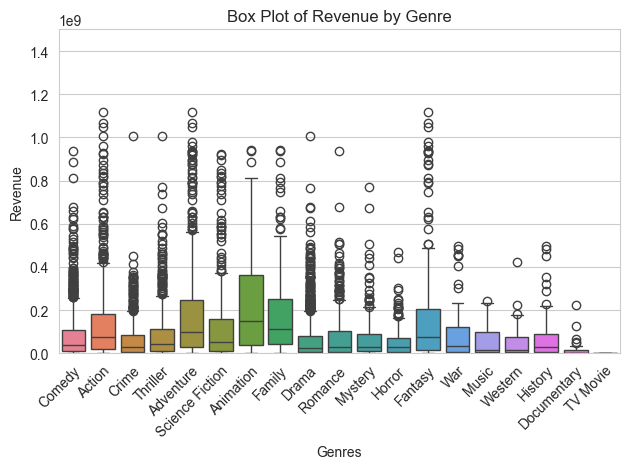

In [9]:
movies_genres = movies.explode('genres', )

sns.boxplot(movies_genres, x = 'genres', y = 'revenue', hue = 'genres')
# Set plot labels and title
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue by Genre')

# Limit the y-axis (adjust according to your dataset)
plt.ylim(0, 1.5e9)  # Example: limit to 1.5 billion

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()

plt.savefig("movies_genres.png")
plt.show()
plt.close()

In [10]:
movies_genres.head(20)

,id,title,release_date,revenue,budget,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,sentiment
0,5,Four Rooms,1995-12-09,4257354,4000000,"Miramax, A Band Apart",Comedy,13.275,5.800,2618,It's Ted the Bellhop's first night on the job....,No reviews available,0.0000
1,6,Judgment Night,1993-10-15,12136938,21000000,"Largo Entertainment, JVC, Universal Pictures",Action,9.284,6.500,331,"Four young friends, while taking a shortcut en...",No reviews available,0.0000
1,6,Judgment Night,1993-10-15,12136938,21000000,"Largo Entertainment, JVC, Universal Pictures",Crime,9.284,6.500,331,"Four young friends, while taking a shortcut en...",No reviews available,0.0000
1,6,Judgment Night,1993-10-15,12136938,21000000,"Largo Entertainment, JVC, Universal Pictures",Thriller,9.284,6.500,331,"Four young friends, while taking a shortcut en...",No reviews available,0.0000
2,11,Star Wars,1977-05-25,775398007,11000000,"Lucasfilm Ltd., 20th Century Fox",Adventure,81.543,8.200,20457,Princess Leia is captured and held hostage by ...,"(As I'm writing this review, Darth Vader's the...",0.9998
2,11,Star Wars,1977-05-25,775398007,11000000,"Lucasfilm Ltd., 20th Century Fox",Action,81.543,8.200,20457,Princess Leia is captured and held hostage by ...,"(As I'm writing this review, Darth Vader's the...",0.9998
2,11,Star Wars,1977-05-25,775398007,11000000,"Lucasfilm Ltd., 20th Century Fox",Science Fiction,81.543,8.200,20457,Princess Leia is captured and held hostage by ...,"(As I'm writing this review, Darth Vader's the...",0.9998
3,12,Finding Nemo,2003-05-30,940335536,94000000,Pixar,Animation,85.328,7.819,19102,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,0.9976
3,12,Finding Nemo,2003-05-30,940335536,94000000,Pixar,Family,85.328,7.819,19102,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,0.9976
4,13,Forrest Gump,1994-06-23,677387716,55000000,"Paramount Pictures, The Steve Tisch Company, W...",Comedy,106.538,8.472,27251,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,0.9963
